# 강화학습 모델 생성

## 데이터 선언

In [98]:
from scipy.io import loadmat
import numpy as np
np.set_printoptions(formatter={'float': '{:0.5f}'.format})

import pandas as pd

# .mat 파일 로드
data = loadmat('pvLoadPriceData_test.mat')

# 데이터 추출 예시
# MATLAB 파일 내에 있는 변수 이름을 정확히 알아야 합니다. time, cloudyDay, clearDay, loadData, costData
time = data['time'].flatten()
solarData = data['clearDay'].flatten()  # [kW]
loadData = data['loadData'][:, 2].flatten() * 10e-5   # [kW]
costData = data['costData'].flatten() * 300/3600

print("자료형:", type(time), "차원" , time.shape, )
print("자료형:", type(solarData), "차원" , solarData.shape, )
print("자료형:", type(loadData), "차원" , loadData.shape, )
print("자료형:", type(costData), "차원" , costData.shape, )

자료형: <class 'numpy.ndarray'> 차원 (228,)
자료형: <class 'numpy.ndarray'> 차원 (228,)
자료형: <class 'numpy.ndarray'> 차원 (228,)
자료형: <class 'numpy.ndarray'> 차원 (228,)


In [99]:
sum(loadData)

37568142.81525675

In [100]:
3551797.5 / 1000

3551.7975

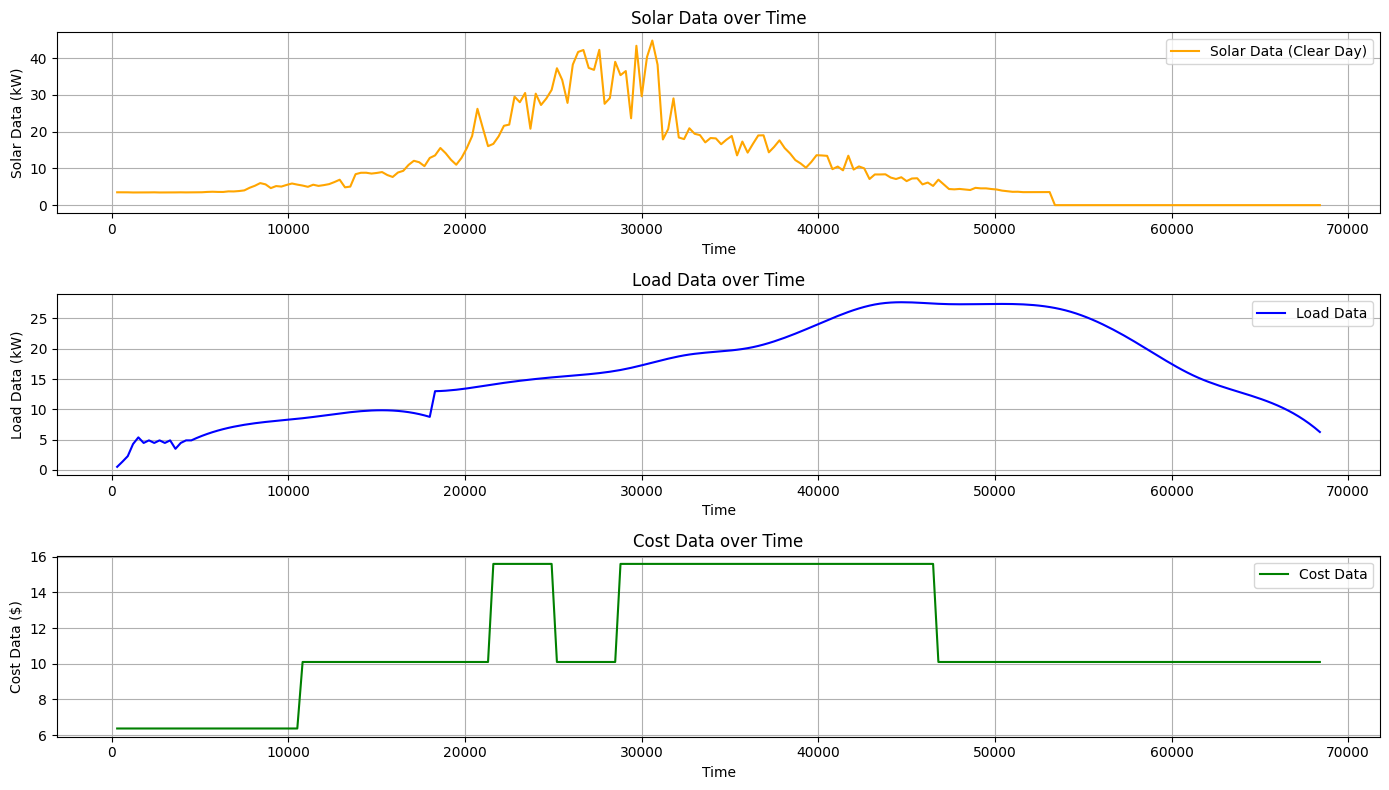

In [101]:
import matplotlib.pyplot as plt

# .mat 파일 로드
data = loadmat('pvLoadPriceData_test.mat')

# 데이터 추출 예시
# MATLAB 파일 내에 있는 변수 이름을 정확히 알아야 합니다. time, cloudyDay, clearDay, loadData, costData
time = data['time'].flatten()
solarData = data['clearDay'].flatten()  # [kW]
loadData = data['loadData'][:, 2].flatten() * 10e-5   # [kW]
costData = data['costData'].flatten() * 300/3600

# 데이터 시각화
plt.figure(figsize=(14, 8))

# 시간 vs 태양광 데이터
plt.subplot(3, 1, 1)
plt.plot(time, solarData, label='Solar Data (Clear Day)', color='orange')
plt.xlabel('Time')
plt.ylabel('Solar Data (kW)')
plt.title('Solar Data over Time')
plt.legend()
plt.grid(True)

# 시간 vs 부하 데이터
plt.subplot(3, 1, 2)
plt.plot(time, loadData, label='Load Data', color='blue')
plt.xlabel('Time')
plt.ylabel('Load Data (kW)')
plt.title('Load Data over Time')
plt.legend()
plt.grid(True)

# 시간 vs 비용 데이터
plt.subplot(3, 1, 3)
plt.plot(time, costData, label='Cost Data', color='green')
plt.xlabel('Time')
plt.ylabel('Cost Data ($)')
plt.title('Cost Data over Time')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


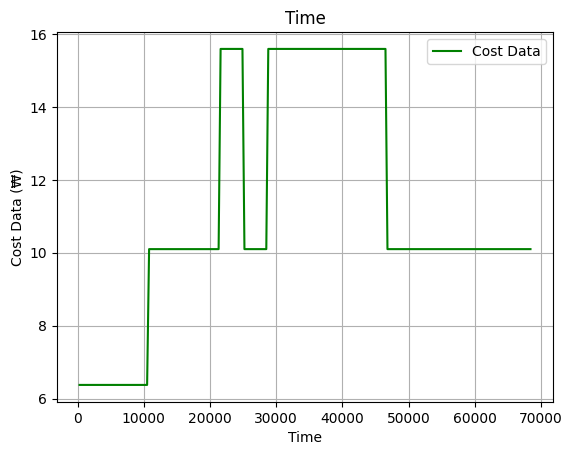

In [102]:
# 시간 vs 태양광 데이터
plt.plot(time, costData, label='Cost Data', color='green')
plt.xlabel('Time')
plt.ylabel('Cost Data (₩)')
plt.title('Time')
plt.legend()
plt.grid(True)
plt.show()

In [60]:
import numpy as np
import pandas as pd

# 총 에너지 사용량 (Watt-Hours)
total_energy_wh = 3551797.5

# 데이터 포인트 개수
num_data_points = 228

# 무작위로 전력 사용량 생성 (가중치 사용)
np.random.seed(0)  # 재현성을 위해 시드 설정
random_weights = np.random.rand(num_data_points)
random_weights /= random_weights.sum()  # 가중치의 합이 1이 되도록 정규화

# 각 데이터 포인트의 에너지 사용량 (Watt-Hours)
energy_per_point_wh = random_weights * total_energy_wh  / 1000

# 시간 간격 (1일 = 24시간)
time_interval_minutes = 24 * 60 / num_data_points  # 각 데이터 포인트의 시간 간격 (분 단위)

# 시간 배열 생성
time_points = pd.date_range(start="2024-01-01", periods=num_data_points, freq=f'{int(time_interval_minutes)}T')



# 출력
print(energy_per_point_wh)


[17.10468 22.29006 18.78611 16.98218 13.20390 20.13036 13.63813 27.79358
 30.03414 11.95059 24.67542 16.48388 17.70405 28.84775 2.21396 2.71553
 0.63014 25.94997 24.25254 27.11536 30.50025 24.90709 14.38277 24.32648
 3.68622 19.94419 4.46784 29.44216 16.26426 12.92362 8.24531 24.13027
 14.21668 17.71618 0.58562 19.24963 19.07697 19.22777 29.41347 21.25005
 11.20466 13.62082 21.74283 1.87703 20.78088 20.90154 6.55692 4.01820
 9.83084 11.33565 17.77112 13.66974 30.80430 3.18039 6.50999 5.02748
 20.35520 7.89425 14.53334 7.61793 4.95455 3.44002 20.45559 4.30670
 6.12681 11.49193 25.58761 3.02632 26.11594 2.99507 30.43297 14.60629
 30.44237 18.85101 23.04037 1.22135 8.81415 3.74612 9.22970 3.70035
 9.91047 12.91119 1.99926 21.58204 17.65907 8.27130 16.30789 2.92781
 17.95032 28.96305 9.92873 20.80095 4.10770 22.32552 9.01982 5.70946
 18.27964 0.62668 25.83528 0.14634 21.12527 8.41524 22.91353 29.98819
 7.75280 17.95689 18.45196 17.83517 6.95271 29.69399 13.93540 26.37972
 21.80043 9.27011 

In [61]:
loadData = energy_per_point_wh.tolist()

## 수전해 함수 선언

In [83]:
def P2G(power_kW, time_hours=1):
    """
    잉여 전력[kW] -> 수소 가스[Kg]
    """
    efficiency = 0.7  # Efficiency of the process
    heating_value_hydrogen = 33.33  # Heating value of hydrogen in kWh/kg

    hydrogen_produced_kg = (power_kW * time_hours * efficiency * heating_value_hydrogen) / 1000
    return hydrogen_produced_kg

# Example usage:
power = 100  # Power in kW

# Calculate hydrogen production for 1 hour
hydrogen_output = P2G(power)
print(f"Produced hydrogen: {hydrogen_output:.5f} kg")

Produced hydrogen: 2.33310 kg


In [84]:
# 남은 수소를 다시 잉여 전력으로
def P2Ga(hydrogen_produced_kg, time_hours=1):
    """
    남은 수소 가스를 다시 잉여 전력으로 변환
    """
    efficiency = 0.7  # Efficiency of the process
    heating_value_hydrogen = 33.33  # Heating value of hydrogen in kWh/kg

    power_kW = (hydrogen_produced_kg * 1000) / (time_hours * efficiency * heating_value_hydrogen)
    return power_kW

# Example usage:
power = 2.33310  # Power in kW

# Calculate hydrogen production for 1 hour
hydrogen_output = P2Ga(power)
print(f"Produced hydrogen: {hydrogen_output:.5f} kWh")

Produced hydrogen: 100.00000 kWh


In [85]:
# 수소 -> 전력
def G2P(hydrogen_kg):
    """
    Calculate the amount of electricity produced from hydrogen using a PEM fuel cell.

    Parameters:
    hydrogen_kg (float): The amount of hydrogen used in kilograms.
    fuel_cell_efficiency (float): The efficiency of the fuel cell (0-1).

    Returns:
    float: The amount of electricity produced in kilowatt-hours.
    """
    efficiency = 0.5  # Efficiency of the fuel cell

    heating_value_hydrogen = 33.33  # Heating value of hydrogen in kWh/kg
    electricity_produced_kWh = heating_value_hydrogen * efficiency * hydrogen_kg
    return electricity_produced_kWh

# Example usage:
hydrogen_amount = 2.33310  # Amount of hydrogen in kg
# Calculate electricity production
electricity_output = G2P(hydrogen_amount)
print(f"Electricity produced: {electricity_output:.5f} kWh")

Electricity produced: 38.88111 kWh


In [86]:
# 가스를 수소로 바꿨을 때 x만큼 필요함. 얼만큼의 수소를 쓸지 계산할 때
def G2Pa(tNeedPower):
    """
    X의 전력을 내기 위해 수소 탱크에서 필요한 수소[kg]\n
    필요한 수소[kg] = 전력 / (33.33 * 0.5)
    """
    efficiency = 0.5  # Efficiency of the fuel cell

    heating_value_hydrogen = 33.33  # Heating value of hydrogen in kWh/kg
    tNeedHydrogen = tNeedPower / (heating_value_hydrogen * efficiency) 
    return tNeedHydrogen

# Example usage:
hydrogen_amount = 38.88111 # Amount of hydrogen in kg
# Calculate electricity production
electricity_output = G2Pa(hydrogen_amount)
print(f"Electricity produced: {electricity_output:.5f} Kg")

Electricity produced: 2.33310 Kg


## 강화학습 환경 설정

In [87]:
import numpy as np
import gym
from gym import spaces

# 전력망 환경 클래스 정의
class PowerGridEnv(gym.Env):
    def __init__(self):
        self.solar_data = solarData
        self.load_data = loadData
        self.price_data = costData

        self.HydroCap = 100  # 수소 저장 장치 용량 [kg]
        HydrogenEnergyDensity = 33.33 # 수소 1Kg 당 [kWh]
        self.HydrogenEnergy = self.HydroCap * HydrogenEnergyDensity # 총 에너지 용량
        
        self.Hydrogen = 0.5 * self.HydroCap
        self.HydrogenMin = 0.2 * self.HydroCap
        self.HydrogenMax = 0.9 * self.HydroCap

        self.total_grid_cost = 0
        self.state = None

        # 배터리 상태
        self.observation_space = spaces.Box(low=np.array([0]), high=np.array([100]))
        
        # 액션 종류
        self.action_space = spaces.Discrete(7)
        self.data_pointer = 0
        

    def reset(self):
        self.data_pointer = 0
        self.Hydrogen = 0.5 * self.HydroCap  # 수소 가스 상태
        self.total_grid_cost = 0
        action = 0
        reward = 0
        done = False

        tP2G = 0
        tG2P = 0
        tNeedPower = 0

        self.state = [self.solar_data[0], self.load_data[0], (self.Hydrogen/self.HydroCap) * 100, (tP2G/self.HydroCap) * 100, ((-tG2P/self.HydroCap) * 100), action, self.total_grid_cost]
        return np.array(self.state), reward, done, {"cost" : self.total_grid_cost}

    
    def render(self, mode='human'):
        # 가정: self.state는 환경의 현재 상태를 나타냅니다.
        # 간단한 텍스트 출력으로 상태를 표현합니다.
        print(f"Current state: {self.state}")
        
    def step(self, action):
        reward = 0
       
        tPV = self.solar_data[self.data_pointer]    # 스탭 당 태양광 발전량
        tLoad = self.load_data[self.data_pointer]   # 스탭 당 부하량
        tPrice = self.price_data[self.data_pointer] # 스탭 당 전력 가격

        tP2G = 0
        tG2P = 0
        tNeedPower = 0

        # 액션에 따른 배터리 및 그리드 상호작용
        if action == 0 : # 태양광 O 수소 X 그리드 X
            if tPV >= tLoad :
                tSurplusPower = tPV - tLoad # 잉여 전력 계산 -> 잉여 전력이 있다면 수소로 변환 후 저장
                if tSurplusPower > 0 : 
                    # 수소 탱크의 충전 가능(kg)
                    # 최대 충전량 - 현재 충전량 = 충전 가능량
                    tPossible_Hydrogen = self.HydrogenMax - self.Hydrogen

                    # Power[kW] to Gas[kg]
                    tP2G = P2G(tSurplusPower) # 잉여 전력 -> 수소 가스로 변환
                    
                    # 수소 탱크에 충전할 전력 계산
                    tPowerChg = min(tP2G, tPossible_Hydrogen) # 잉여 수소 가스랑 수소 탱크 충전 가능량을 비교해서 더 작은 값을 충전
                    tSurplusChg = tP2G - tPowerChg # 충전하고 남은 가스량
                    tP2G = tPowerChg
                    
                    # 배터리를 충전했을 때 20~80% 일 때
                    if ((self.Hydrogen + tPowerChg) > self.HydrogenMin) and ((self.Hydrogen + tPowerChg) < self.HydrogenMax) :
                        self.Hydrogen += tPowerChg
                    # 배터리를 충전했을 때 80% 이상일 때
                    else :
                        self.Hydrogen += tPowerChg
                        self.total_grid_cost -= P2Ga(tSurplusChg) * tPrice
                        reward = -P2Ga(tSurplusChg) * tPrice

            else : # tLoad > tPV
                # 태양광 발전량으로 커버한 뒤 필요한 전력을 계산
                tNeedPower = tLoad - tPV
                tG2P = G2Pa(tNeedPower) # 필요한 수소 가스 계산[kg]

                # 수소 탱크의 방전 가능(%)
                tPossible_Hydrogen = self.Hydrogen - self.HydrogenMin

                # 수소 텡크에서 사용할 양(L) 계산
                tPowerDisChg = min(tG2P, tPossible_Hydrogen) # 필요한 전력이랑 배터리 뱡젼 가능량을 비교해서 더 작은 값을 방전
                tSurplusChg = tG2P - tPowerDisChg # 충전하고 남은 수소[kg]
                tG2P = tPowerDisChg
                                
                # 배터리를 방전했을 때 20~80% 일 때
                if ((self.Hydrogen - tPowerDisChg) > self.HydrogenMin) and ((self.Hydrogen - tPowerDisChg) < self.HydrogenMax) :
                    self.Hydrogen -= tPowerDisChg
                # 배터리를 방전했을 때 20% 이하일 때
                else :
                    self.Hydrogen -= tPowerDisChg
                    self.total_grid_cost += G2P(tSurplusChg) * tPrice
                    reward = G2P(tSurplusChg) * tPrice


        elif action == 1 : # 태양광 O 수소 O 그리드 X
            if tLoad > tPV :
                # 태양광 발전량으로 커버한 뒤 필요한 전력을 계산
                tNeedPower = tLoad - tPV
                tG2P = G2Pa(tNeedPower) # 필요한 수소 가스 계산[kg]

                # 수소 탱크의 방전 가능(%)
                tPossible_Hydrogen = self.Hydrogen - self.HydrogenMin

                # 수소 텡크에서 사용할 양(L) 계산
                tPowerDisChg = min(tG2P, tPossible_Hydrogen) # 필요한 전력이랑 배터리 뱡젼 가능량을 비교해서 더 작은 값을 방전
                tSurplusChg = tG2P - tPowerDisChg # 방전하고 남은 전력량
                tG2P = tPowerDisChg

                # 배터리를 방전했을 때 20~80% 일 때
                if ((self.Hydrogen - tPowerDisChg) > self.HydrogenMin) and ((self.Hydrogen - tPowerDisChg) < self.HydrogenMax) :
                    self.Hydrogen -= tPowerDisChg
                # 배터리를 방전했을 때 20% 이하일 때
                else :
                    self.Hydrogen -= tPowerDisChg
                    self.total_grid_cost += G2P(tSurplusChg) * tPrice
                    reward = G2P(tSurplusChg) * tPrice


            else : # tLoad < tPV 
                tSurplusPower = tPV - tLoad # 잉여 전력 계산 -> 잉여 전력이 있다면 수소로 변환 후 저장
                if tSurplusPower > 0 : 
                    # Power[kW] to Gas[kg]
                    tP2G = P2G(tSurplusPower) # 잉여 전력 -> 수소 가스로 변환
                    
                    # 수소 탱크의 충전 가능(kg)
                    tPossible_Hydrogen = self.HydrogenMax - self.Hydrogen

                    # 수소 탱크에 충전할 전력 계산
                    tPowerChg = min(tP2G, tPossible_Hydrogen) # 잉여 수소 가스랑 수소 탱크 충전 가능량을 비교해서 더 작은 값을 충전
                    tSurplusChg = tP2G - tPowerChg # 충전하고 남은 전력량
                    tP2G = tPowerChg
                    
                    # 배터리를 충전했을 때 20~80% 일 때
                    if ((self.Hydrogen + tPowerChg) > self.HydrogenMin) and ((self.Hydrogen + tPowerChg) < self.HydrogenMax) :
                        self.Hydrogen += tPowerChg
                    # 배터리를 충전했을 때 80% 이상일 때
                    else :
                        self.Hydrogen += tPowerChg
                        self.total_grid_cost -= P2Ga(tSurplusChg) * tPrice
                        reward = -P2Ga(tSurplusChg) * tPrice

    
        elif action == 2 : # 태양광 O 수소 X 그리드 O
            if tLoad > tPV :
                tNeedPower = tLoad - tPV # 태양광 발전량으로 커버한 뒤 필요한 전력을 계산
                if tNeedPower > 0 : # 전력이 더 필요할 경우
                    self.total_grid_cost += tNeedPower * tPrice
                    reward = tNeedPower * tPrice

            else : # tLoad < tPV 
                tSurplusPower = tPV - tLoad # 잉여 전력 계산 -> 잉여 전력이 있다면 수소로 변환 후 저장
                if tSurplusPower > 0 : 
                    # Power[kW] to Gas[kg]
                    tP2G = P2G(tSurplusPower) # 잉여 전력 -> 수소 가스로 변환
                    
                    # 수소 탱크의 충전 가능(kg)
                    tPossible_Hydrogen = self.HydrogenMax - self.Hydrogen

                    # 수소 탱크에 충전할 전력 계산
                    tPowerChg = min(tP2G, tPossible_Hydrogen) # 잉여 수소 가스랑 수소 탱크 충전 가능량을 비교해서 더 작은 값을 충전
                    tSurplusChg = tP2G - tPowerChg # 충전하고 남은 전력량
                    tP2G = tPowerChg
                    
                    # 배터리를 충전했을 때 20~80% 일 때
                    if ((self.Hydrogen + tPowerChg) > self.HydrogenMin) and ((self.Hydrogen + tPowerChg) < self.HydrogenMax) :
                        self.Hydrogen += tPowerChg
                    # 배터리를 충전했을 때 80% 이상일 때
                    else :
                        self.Hydrogen += tPowerChg
                        self.total_grid_cost -= P2Ga(tSurplusChg) * tPrice
                        reward = -P2Ga(tSurplusChg) * tPrice


        elif action == 3 : # 태양광 O 수소 O 그리드 O
            if tLoad > tPV :
                # 태양광 발전량으로 커버한 뒤 필요한 전력을 계산
                tNeedPower = tLoad - tPV
                tG2P = G2Pa(tNeedPower) # 필요한 수소 가스 계산[kg]

                # 수소 탱크의 방전 가능(%)
                tPossible_Hydrogen = self.Hydrogen - self.HydrogenMin

                # 수소 텡크에서 사용할 양(L) 계산
                tPowerDisChg = min(tG2P, tPossible_Hydrogen) # 필요한 전력이랑 배터리 뱡젼 가능량을 비교해서 더 작은 값을 방전
                tSurplusChg = tG2P - tPowerDisChg # 충전하고 남은 전력량
                tG2P = tPowerDisChg
                
                # 배터리를 방전했을 때 20~80% 일 때
                if ((self.Hydrogen - tPowerDisChg) > self.HydrogenMin) and ((self.Hydrogen - tPowerDisChg) < self.HydrogenMax) :
                    self.Hydrogen -= tPowerDisChg
                # 배터리를 방전했을 때 20% 이하일 때
                else :
                    self.Hydrogen -= tPowerDisChg
                    self.total_grid_cost += G2P(tSurplusChg) * tPrice
                    reward = G2P(tSurplusChg) * tPrice
             

            else : # tLoad < tPV 
                tSurplusPower = tPV - tLoad # 잉여 전력 계산 -> 잉여 전력이 있다면 수소로 변환 후 저장
                if tSurplusPower > 0 : 
                    # Power[kW] to Gas[kg]
                    tP2G = P2G(tSurplusPower) # 잉여 전력 -> 수소 가스로 변환
                    
                    # 수소 탱크의 충전 가능(kg)
                    tPossible_Hydrogen = self.HydrogenMax - self.Hydrogen

                    # 수소 탱크에 충전할 전력 계산
                    tPowerChg = min(tP2G, tPossible_Hydrogen) # 잉여 수소 가스랑 수소 탱크 충전 가능량을 비교해서 더 작은 값을 충전
                    tSurplusChg = tP2G - tPowerChg # 충전하고 남은 전력량
                    tP2G = tPowerChg
                    
                    # 배터리를 충전했을 때 20~80% 일 때
                    if ((self.Hydrogen + tPowerChg) > self.HydrogenMin) and ((self.Hydrogen + tPowerChg) < self.HydrogenMax) :
                        self.Hydrogen += tPowerChg
                    # 배터리를 충전했을 때 80% 이상일 때
                    else :
                        self.Hydrogen += tPowerChg
                        self.total_grid_cost -= P2Ga(tSurplusChg) * tPrice
                        reward = -P2Ga(tSurplusChg) * tPrice
                            

        elif action == 4 : # 태양광 X 수소 O 그리드 X
            if tLoad > tPV :
                # 필요한 수소 가스 계산[kg]
                tG2P = G2Pa(tLoad)
                # 수소 탱크의 방전 가능(%)
                tPossible_Hydrogen = self.Hydrogen - self.HydrogenMin

                # 수소 텡크에서 사용할 양(L) 계산
                tPowerDisChg = min(tG2P, tPossible_Hydrogen) # 필요한 전력이랑 배터리 뱡젼 가능량을 비교해서 더 작은 값을 방전
                tSurplusChg = tG2P - tPowerDisChg # 충전하고 남은 전력량
                tG2P = tPowerDisChg

                # 배터리를 방전했을 때 20~80% 일 때
                if ((self.Hydrogen - tPowerDisChg) > self.HydrogenMin) and ((self.Hydrogen - tPowerDisChg) < self.HydrogenMax) :
                    self.Hydrogen -= tPowerDisChg
                # 배터리를 방전했을 때 20% 이하일 때
                else :
                    self.Hydrogen -= tPowerDisChg
                    self.total_grid_cost += G2P(tSurplusChg) * tPrice
                    reward = G2P(tSurplusChg) * tPrice
            
            else : # tLoad < tPV 
                tSurplusPower = tPV - tLoad # 잉여 전력 계산 -> 잉여 전력이 있다면 수소로 변환 후 저장
                if tSurplusPower > 0 : 
                    # Power[kW] to Gas[kg]
                    tP2G = P2G(tSurplusPower) # 잉여 전력 -> 수소 가스로 변환
                    
                    # 수소 탱크의 충전 가능(kg)
                    tPossible_Hydrogen = self.HydrogenMax - self.Hydrogen

                    # 수소 탱크에 충전할 전력 계산
                    tPowerChg = min(tP2G, tPossible_Hydrogen) # 잉여 수소 가스랑 수소 탱크 충전 가능량을 비교해서 더 작은 값을 충전
                    tSurplusChg = tP2G - tPowerChg # 충전하고 남은 전력량
                    tP2G = tPowerChg
                    
                    # 배터리를 충전했을 때 20~80% 일 때
                    if ((self.Hydrogen + tPowerChg) > self.HydrogenMin) and ((self.Hydrogen + tPowerChg) < self.HydrogenMax) :
                        self.Hydrogen += tPowerChg
                    # 배터리를 충전했을 때 80% 이상일 때
                    else :
                        self.Hydrogen += tPowerChg
                        self.total_grid_cost -= P2Ga(tSurplusChg) * tPrice 
                        reward = -P2Ga(tSurplusChg) * tPrice 


        elif action == 5 : # 태양광 X 수소 X 그리드 O
            self.total_grid_cost += tLoad * tPrice
            reward = tLoad * tPrice


        elif action == 6 : # 태양광 X 수소 O 그리드 O
            if tLoad > tPV :
                # 필요한 수소 가스 계산[kg]
                tG2P = G2Pa(tLoad)
                # 수소 탱크의 방전 가능(%)
                tPossible_Hydrogen = self.Hydrogen - self.HydrogenMin

                # 수소 텡크에서 사용할 양(L) 계산
                tPowerDisChg = min(tG2P, tPossible_Hydrogen) # 필요한 전력이랑 배터리 뱡젼 가능량을 비교해서 더 작은 값을 방전
                tSurplusChg = tG2P - tPowerDisChg # 방전하고 필요한 전력량
                tG2P = tPowerDisChg

                # 배터리를 방전했을 때 20~80% 일 때
                if ((self.Hydrogen - tPowerDisChg) > self.HydrogenMin) and ((self.Hydrogen - tPowerDisChg) < self.HydrogenMax) :
                    self.Hydrogen -= tPowerDisChg
                # 배터리를 방전했을 때 20% 이하일 때
                else :
                    self.Hydrogen -= tPowerDisChg
                    self.total_grid_cost += G2P(tSurplusChg) * tPrice
                    reward = G2P(tSurplusChg) * tPrice
            
            else : # tLoad < tPV 
                tSurplusPower = tPV - tLoad # 잉여 전력 계산 -> 잉여 전력이 있다면 수소로 변환 후 저장
                if tSurplusPower > 0 : 
                    # Power[kW] to Gas[kg]
                    tP2G = P2G(tSurplusPower) # 잉여 전력 -> 수소 가스로 변환
                    
                    # 수소 탱크의 충전 가능(kg)
                    tPossible_Hydrogen = self.HydrogenMax - self.Hydrogen

                    # 수소 탱크에 충전할 전력 계산
                    tPowerChg = min(tP2G, tPossible_Hydrogen) # 잉여 수소 가스랑 수소 탱크 충전 가능량을 비교해서 더 작은 값을 충전
                    tSurplusChg = tP2G - tPowerChg # 충전하고 남은 전력량
                    tP2G = tPowerChg

                    # 배터리를 충전했을 때 20~80% 일 때
                    if ((self.Hydrogen + tPowerChg) > self.HydrogenMin) and ((self.Hydrogen + tPowerChg) < self.HydrogenMax) :
                        self.Hydrogen += tPowerChg
                    # 배터리를 충전했을 때 80% 이상일 때
                    else :
                        self.Hydrogen += tPowerChg
                        self.total_grid_cost -= P2Ga(tSurplusChg) * tPrice 
                        reward = -P2Ga(tSurplusChg) * tPrice 


        # 데이터 포인터 갱신
        if self.data_pointer >= len(self.solar_data) - 1:
            done = True
        else:
            done = False
            self.data_pointer += 1

        # reward = 1 if done else 0
        self.state = [tPV, tLoad, (self.Hydrogen/self.HydroCap) * 100, (tP2G/self.HydroCap) * 100, ((-tG2P/self.HydroCap) * 100), action, self.total_grid_cost]
        return np.array(self.state), reward, done, {"cost" : self.total_grid_cost}


# 환경 인스턴스 생성 및 초기화
env = PowerGridEnv()
state = env.reset()
done = False

print("    PV     Load    SOC(%)   충전량    방전량    액션   누적 비용")

while not done:
    action = env.action_space.sample()  # 무작위 액션
    state, reward, done, info = env.step(action)
    
    print("", state, "보상", reward)




    PV     Load    SOC(%)   충전량    방전량    액션   누적 비용
 [3.50000 0.52154 50.06949 0.06949 0.00000 6.00000 0.00000] 보상 0
 [3.51000 1.37357 50.11934 0.04985 0.00000 6.00000 0.00000] 보상 0
 [3.49000 2.28354 50.14748 0.02815 0.00000 2.00000 0.00000] 보상 0
 [3.45000 4.28575 49.89031 0.00000 -0.25717 4.00000 0.00000] 보상 0
 [3.45000 5.38219 49.56735 0.00000 -0.32296 4.00000 0.00000] 보상 0
 [3.47000 4.46139 49.50786 0.00000 -0.05949 0.00000 0.00000] 보상 0
 [3.47000 4.88668 49.42285 0.00000 -0.08501 3.00000 0.00000] 보상 0
 [3.49000 4.46139 49.42285 0.00000 0.00000 5.00000 28.44135] 보상 28.441352740538726
 [3.45000 4.88668 49.42285 0.00000 0.00000 5.00000 59.59396] 보상 31.152606356497216
 [3.45000 4.46139 49.36216 0.00000 -0.06069 0.00000 59.59396] 보상 0
 [3.47000 4.88668 49.06893 0.00000 -0.29323 4.00000 59.59396] 보상 0
 [3.47000 3.49172 49.06763 0.00000 -0.00130 0.00000 59.59396] 보상 0
 [3.49000 4.46139 49.00934 0.00000 -0.05829 3.00000 59.59396] 보상 0
 [3.47000 4.88668 48.92433 0.00000 -0.08501 1.00000 59

/opt/miniconda3/envs/DQN/lib/python3.8/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


## Q-learing 설정

In [88]:
import random
import matplotlib.pyplot as plt

# 환경 초기화
env = PowerGridEnv()
state_size = len(loadData)
action_size = env.action_space.n

q_table = np.zeros((state_size, action_size))
alpha = 0.05    # 학습률
gamma = 0.6    # 할인율
epsilon = 0.1   # 탐험률

cost_table = []
best_action_table = []
min_cost = float('inf')  # 최소 비용을 기록하기 위한 변수
random.seed(80)
# 학습 과정
for i in range(3000):
    num = 0
    action_table = []
    state = env.reset()
    done = False
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmin(q_table[num])

        action_table.append(action)

        next_state, reward, done, info = env.step(action)
        old_value = q_table[num, action]
        next_max = np.max(q_table[num])
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[num, action] = new_value
        num += 1

        # 비용 최소화 조건 검사
        if done and info['cost'] < min_cost:
            min_cost = info['cost']
            best_action_table = action_table  # 최적 상태 갱신

    cost_table.append(next_state[6])


In [89]:
pd.set_option('display.max_rows', None) # 항상 모두 출력
pd.DataFrame(q_table)

,0,1,2,3,4,5,6
0,3.031087,3.032109,3.031672,3.032266,3.032100,5.095924,3.031389
1,7.614508,7.612951,7.614738,7.610089,7.610157,12.891765,7.613825
2,13.005334,13.004287,13.007252,13.005405,13.004777,21.731638,13.005329
3,22.147218,22.157144,22.449717,22.147455,22.152148,37.243363,22.156987
4,25.110366,25.132770,29.455656,25.107714,25.132616,43.483402,25.132732
5,27.175144,27.176922,27.917087,27.182731,27.197976,46.235076,27.197794
6,24.503004,24.487607,26.617299,24.501560,24.515289,41.738426,24.515294
7,23.535520,23.538807,23.684834,23.523369,23.524561,40.050532,23.523377
8,27.362995,27.373763,28.462398,27.359543,27.367564,46.519215,27.363181
9,26.840831,26.841067,28.448795,26.832574,26.840820,45.213280,26.841034


In [90]:
min(cost_table)

13097.450105998623

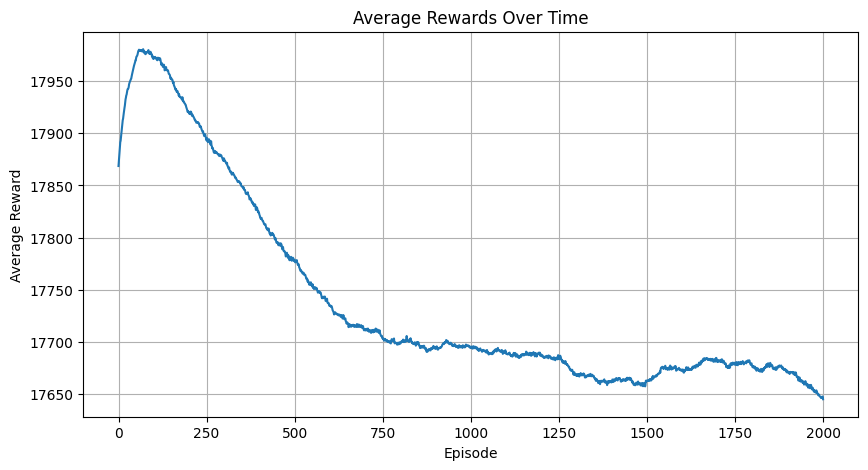

In [91]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

# 보상의 이동 평균 계산
moving_avg_rewards = moving_average(cost_table, 1000)  # 1000 에피소드 평균

# 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(moving_avg_rewards)
plt.title('Average Rewards Over Time')
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.grid(True)
plt.show()


In [79]:
done = False
num = 0
env.reset()
cost = 0
soc = []
grid = []
while not done:
    action = best_action_table[num]

    state, reward, done, _ = env.step(action)
    soc.append(state[2])
    grid.append(reward)
    num += 1
    cost += reward
    env.render()

Current state: [3.5, 0.521540859602613, 50.06949043020461, 0.06949043020461143, 0.0, 0, 0]
Current state: [3.51, 1.3735691502060512, 50.11933549836115, 0.04984506815654262, 0.0, 0, 0]
Current state: [3.49, 2.283542483980296, 50.14748335866741, 0.028147860306255712, 0.0, 0, 0]
Current state: [3.45, 4.285748439511477, 50.097333437304584, 0.0, -0.05014992136282489, 0, 0]
Current state: [3.45, 5.38219314050352, 50.097333437304584, 0.0, 0.0, 5, 34.31148127070994]
Current state: [3.47, 4.461388665182545, 50.03784416846675, 0.0, -0.05948926883783647, 0, 34.31148127070994]
Current state: [3.47, 4.886683350038779, 49.95283466651423, 0.0, -0.08500950195252198, 0, 34.31148127070994]
Current state: [3.49, 4.461388665182545, 49.89454551768839, 0.0, -0.05828914882583528, 0, 34.31148127070994]
Current state: [3.45, 4.886683350038779, 49.80833589572387, 0.0, -0.08620962196452318, 0, 34.31148127070994]
Current state: [3.45, 4.461388665182545, 49.747646506874034, 0.0, -0.06068938884983767, 0, 34.3114812

Text(0.5, 0, 'Time [sec]')

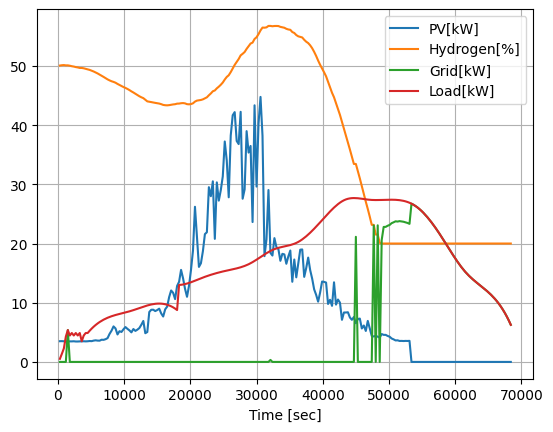

In [92]:
import matplotlib.pyplot as plt

# Assuming Ppv, Pbatt, Pgrid, Pload are obtained from battSolarOptimize
plt.plot(time, solarData, time, soc, time, (grid / costData), time, loadData, )
plt.grid(True)
plt.legend(['PV[kW]', 'Hydrogen[%]', 'Grid[kW]', 'Load[kW]'])
plt.xlabel('Time [sec]')